<a href="https://colab.research.google.com/github/theyashmishra/Cat-Breed-Classifier-based-on-Inception-CNN-Architecture-/blob/main/cat_breed_classifier_inceptionv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***The Project is to classify breed of cat just by image provided ,The model is build on Inception CNN Architecture, I used a pretrained model,Inceptionv3 .***

**Importing all mandatory Libraries**





In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from pathlib import Path
import matplotlib.pyplot as plt # Visualization library
from sklearn.model_selection import train_test_split 
# Data preprocessing libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# evaluation metrics and optimizers
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score,accuracy_score, f1_score

from keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf
import cv2 as cv
import skimage
#inception model and all CNN model layers
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Sequential
from keras.layers.pooling import GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout

**Taking Input:** I have used kaggle api to get data as it is easy to implement and less time consuming just enter your username ,key and api of the dataset.

In [ ]:
os.environ['KAGGLE_USERNAME']="theyashmishra"
os.environ['KAGGLE_KEY']="45d3832331831cbbd093dbd45272c90a"


In [ ]:
!kaggle datasets download -d ma7555/cat-breeds-dataset

 99%|█████████████████████████████████████▋| 1.91G/1.93G [00:22<00:00, 97.6MB/s]
100%|██████████████████████████████████████| 1.93G/1.93G [00:22<00:00, 92.9MB/s]


In [ ]:
#unzipping the file 
from zipfile import ZipFile
filename="./cat-breeds-dataset.zip"
with ZipFile(filename,'r') as zip:
  zip.extractall()
  print("done")

done


In [ ]:
# appending all the images into asingle list
filelist  = []

for dirname, _, filenames in os.walk("./images"):
    for filename in filenames:
        filelist.append (os.path.join(dirname, filename))
        

In [ ]:
len(filelist)# total images

126607

In [ ]:
#labels needed for classification
labels_needed = ['Bombay', 'Calico', 'Burmese', 'Himalayan','Munchkin', 'Ragdoll', 'Siberian', 'British Shorthair', 'Russian Blue', 
                'Dilute Calico']

In [ ]:
filelist

['./images/York Chocolate/46336858_40884.jpg',
 './images/Egyptian Mau/35805546_403.jpg',
 './images/Egyptian Mau/32782161_523.jpg',
 './images/Egyptian Mau/38175679_332.jpg',
 './images/Egyptian Mau/34798362_440.jpg',
 './images/Egyptian Mau/33523925_490.jpg',
 './images/Egyptian Mau/32898310_519.jpg',
 './images/Egyptian Mau/44794342_120.jpg',
 './images/Egyptian Mau/43353996_181.jpg',
 './images/Egyptian Mau/43043224_193.jpg',
 './images/Egyptian Mau/45893818_46.jpg',
 './images/Egyptian Mau/30279145_613.jpg',
 './images/Egyptian Mau/44794160_122.jpg',
 './images/Egyptian Mau/28182928_681.jpg',
 './images/Egyptian Mau/34162996_470.jpg',
 './images/Egyptian Mau/26342600_739.jpg',
 './images/Egyptian Mau/31056143_593.jpg',
 './images/Egyptian Mau/31955962_547.jpg',
 './images/Egyptian Mau/27939113_691.jpg',
 './images/Egyptian Mau/36113497_390.jpg',
 './images/Egyptian Mau/27359756_711.jpg',
 './images/Egyptian Mau/22406575_859.jpg',
 './images/Egyptian Mau/45993894_34.jpg',
 './image

In [ ]:
# Filter all the images and kept only the specified images and tags
Filepaths   = []
tags = []

for image_file in filelist:
    label = image_file.split(os.path.sep)[-2]
    if label in labels_needed:

        Filepaths.append(image_file)
        tags.append(label)

In [ ]:
set(tags)

{'Bombay',
 'British Shorthair',
 'Burmese',
 'Calico',
 'Dilute Calico',
 'Himalayan',
 'Munchkin',
 'Ragdoll',
 'Russian Blue',
 'Siberian'}

In [ ]:
len(Filepaths) # Total images after filtering.

15654

In [ ]:
len(tags)

15654

*making dataframe from list of images filepaths and tags(labels)* 

In [ ]:
dataframe=[]
dataframe.append(Filepaths)
dataframe.append(tags)
dataframe

[['./images/British Shorthair/41603364_427.jpg',
  './images/British Shorthair/45138690_140.jpg',
  './images/British Shorthair/18255883_2065.jpg',
  './images/British Shorthair/23073867_1692.jpg',
  './images/British Shorthair/41883963_404.jpg',
  './images/British Shorthair/46146130_57211.jpg',
  './images/British Shorthair/20788564_1866.jpg',
  './images/British Shorthair/24961582_1560.jpg',
  './images/British Shorthair/33160180_928.jpg',
  './images/British Shorthair/18633245_2013.jpg',
  './images/British Shorthair/33853998_883.jpg',
  './images/British Shorthair/46720419_5.jpg',
  './images/British Shorthair/26241178_1445.jpg',
  './images/British Shorthair/42940184_317.jpg',
  './images/British Shorthair/37328424_671.jpg',
  './images/British Shorthair/27365636_1379.jpg',
  './images/British Shorthair/27330207_1384.jpg',
  './images/British Shorthair/18846287_1986.jpg',
  './images/British Shorthair/18276334_2062.jpg',
  './images/British Shorthair/25638570_1490.jpg',
  './imag

In [ ]:
numpy_array = np.array(dataframe)
transpose = numpy_array.T


transpose_list = transpose.tolist()

print(transpose_list)

[['./images/British Shorthair/41603364_427.jpg', 'British Shorthair'], ['./images/British Shorthair/45138690_140.jpg', 'British Shorthair'], ['./images/British Shorthair/18255883_2065.jpg', 'British Shorthair'], ['./images/British Shorthair/23073867_1692.jpg', 'British Shorthair'], ['./images/British Shorthair/41883963_404.jpg', 'British Shorthair'], ['./images/British Shorthair/46146130_57211.jpg', 'British Shorthair'], ['./images/British Shorthair/20788564_1866.jpg', 'British Shorthair'], ['./images/British Shorthair/24961582_1560.jpg', 'British Shorthair'], ['./images/British Shorthair/33160180_928.jpg', 'British Shorthair'], ['./images/British Shorthair/18633245_2013.jpg', 'British Shorthair'], ['./images/British Shorthair/33853998_883.jpg', 'British Shorthair'], ['./images/British Shorthair/46720419_5.jpg', 'British Shorthair'], ['./images/British Shorthair/26241178_1445.jpg', 'British Shorthair'], ['./images/British Shorthair/42940184_317.jpg', 'British Shorthair'], ['./images/Br

In [ ]:
df=pd.DataFrame(transpose_list,columns=['Filepaths','tags'])

In [ ]:
df

,Filepaths,tags
0,./images/British Shorthair/41603364_427.jpg,British Shorthair
1,./images/British Shorthair/45138690_140.jpg,British Shorthair
2,./images/British Shorthair/18255883_2065.jpg,British Shorthair
3,./images/British Shorthair/23073867_1692.jpg,British Shorthair
4,./images/British Shorthair/41883963_404.jpg,British Shorthair
...,...,...
15649,./images/Himalayan/44581039_423.jpg,Himalayan
15650,./images/Himalayan/46285296_45600.jpg,Himalayan
15651,./images/Himalayan/35376729_2212.jpg,Himalayan
15652,./images/Himalayan/43500925_632.jpg,Himalayan


In [ ]:
img_tags=(df.sample(frac = 1).reset_index())
img_tags.drop(columns = 'index',inplace=True)
img_tags

,Filepaths,tags
0,./images/Himalayan/39066639_1438.jpg,Himalayan
1,./images/Bombay/36829788_3481.jpg,Bombay
2,./images/Calico/45619394_4112.jpg,Calico
3,./images/Ragdoll/39412399_2157.jpg,Ragdoll
4,./images/Russian Blue/44853207_3171.jpg,Russian Blue
...,...,...
15649,./images/Calico/45463125_4569.jpg,Calico
15650,./images/Dilute Calico/39031155_3547.jpg,Dilute Calico
15651,./images/Dilute Calico/43835397_1393.jpg,Dilute Calico
15652,./images/Ragdoll/23619627_6763.jpg,Ragdoll


*shape of dataframe is 15654 x 2*

In [ ]:
img_tags.tags.value_counts()# No. of images per class

Calico               3468
Dilute Calico        3230
Ragdoll              2669
Russian Blue         1870
Bombay               1835
Himalayan            1301
British Shorthair     567
Burmese               344
Siberian              189
Munchkin              181
Name: tags, dtype: int64

*Dataset is Imbalanced as difference between no. of images in different classes is quite big*

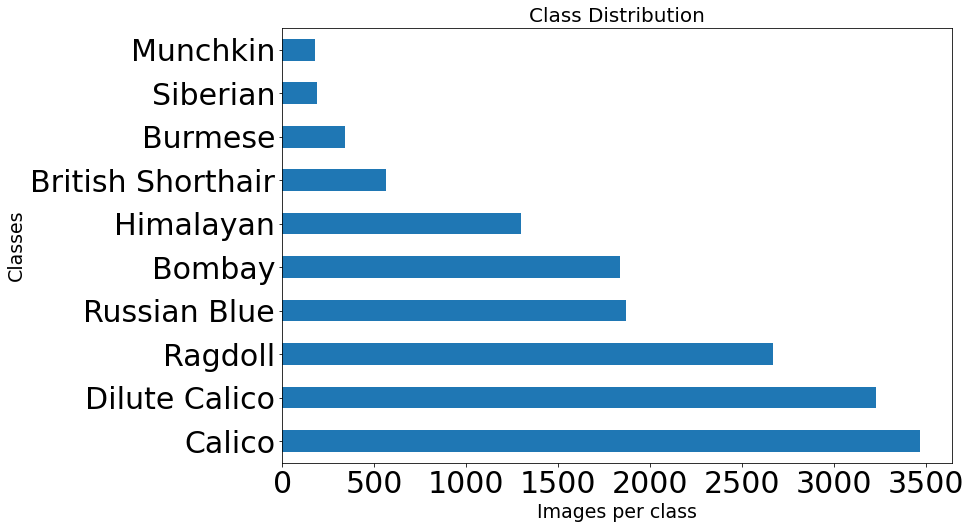

In [ ]:
figr=pd.value_counts(img_tags['tags']).plot(kind='barh', fontsize="30",title="Class Distribution",figsize=(12,8))
figr.set(xlabel="Images per class", ylabel="Classes")
figr.title.set_size(20)
figr.xaxis.label.set_size(19)
figr.yaxis.label.set_size(19)
plt.show()

*As shown in figure the dataset is imbalanced*

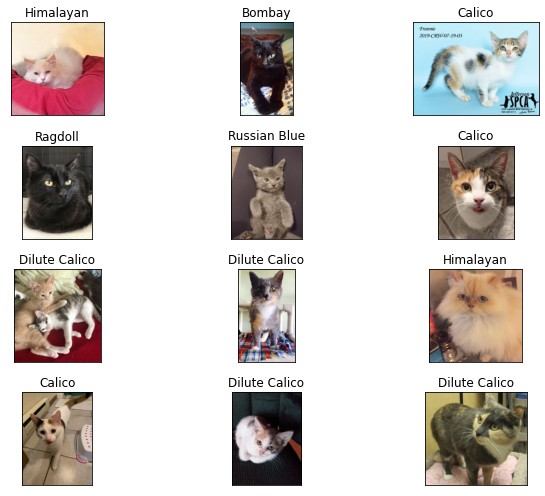

In [ ]:
f,a = plt.subplots(nrows=4, ncols=3,figsize=(10, 7),
                        subplot_kw={'xticks':[], 'yticks':[]})

for i, figr in enumerate(a.flat):
    figr.imshow(plt.imread(img_tags.Filepaths[i]))
    figr.set_title(img_tags.tags[i])
    
plt.tight_layout()
plt.show()

*twelve images of different cats*

**Data Preprocessing **

*   Splitting data into training,test,validation set
*   apply random transformation on images using image data generator



In [ ]:
#splitting dataset
train_ratio = 0.80
validation_ratio = 0.10
test_ratio = 0.20

train, test = train_test_split(img_tags, test_size=test_ratio )
val, test = train_test_split(test, test_size=test_ratio/(test_ratio + validation_ratio))

In [ ]:
# image data generation ,rescaling, rotation,shipting flipping of images is done here
img_datagenerator = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=30, 
                                   width_shift_range=0.2,
                                   height_shift_range=0.2, 
                                   horizontal_flip='true')
   

x_train=img_datagenerator.flow_from_dataframe(dataframe=train,  x_col='Filepaths', y_col='tags', 
                                           target_size=(299, 299), shuffle=False, batch_size=10, seed=10)
x_val=img_datagenerator.flow_from_dataframe(dataframe=val,  x_col='Filepaths', y_col='tags', 
                                        target_size=(299, 299), shuffle=False, batch_size=10, seed=10)
x_test=img_datagenerator.flow_from_dataframe(dataframe=test,  x_col='Filepaths', y_col='tags', 
                                         target_size=(299, 299), shuffle=False, batch_size=10, seed=10)

Found 12523 validated image filenames belonging to 10 classes.
Found 1043 validated image filenames belonging to 10 classes.
Found 2088 validated image filenames belonging to 10 classes.


In [ ]:
x_train

**Downloading our Inceptionv3 model it is made on inception CNN architecture**

In [ ]:
# it is a pretrained model having numerous layers and it is already trained on million on images.
inception=InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
# during model fitting phase we make sure that weights of this model remained unchanged
for layer in inception.layers:
    layer.trainable=False
    
inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

**Model building**

In [ ]:
model = Sequential([
                    inception,
                   
                    GlobalAveragePooling2D(),
                   
                    Dense(128),
                   
                    Dropout(0.2),
                   
                    Dense(10, activation = 'softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 22,066,346
Trainable params: 263,562
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
model.compile(optimizer = SGD(),
              
              metrics=["accuracy"],

             loss="categorical_crossentropy",#categorical_crossentropy is used for multiclass classification
             )

**Model training and predictions(on test data)**

In [ ]:
iterator = model.fit(x_train, validation_data=x_val, steps_per_epoch=175, validation_steps=44, epochs=25, verbose = 2)

Epoch 1/25
175/175 - 59s - loss: 1.7311 - accuracy: 0.4102 - val_loss: 1.2325 - val_accuracy: 0.5773
Epoch 2/25
175/175 - 46s - loss: 1.2932 - accuracy: 0.5469 - val_loss: 1.1110 - val_accuracy: 0.6159
Epoch 3/25
175/175 - 46s - loss: 1.1855 - accuracy: 0.5943 - val_loss: 1.0567 - val_accuracy: 0.6295
Epoch 4/25
175/175 - 46s - loss: 1.1433 - accuracy: 0.5931 - val_loss: 1.1003 - val_accuracy: 0.6045
Epoch 5/25
175/175 - 45s - loss: 1.1000 - accuracy: 0.6023 - val_loss: 1.0250 - val_accuracy: 0.6364
Epoch 6/25
175/175 - 47s - loss: 1.0695 - accuracy: 0.6331 - val_loss: 0.9567 - val_accuracy: 0.6250
Epoch 7/25
175/175 - 45s - loss: 1.0375 - accuracy: 0.6320 - val_loss: 0.9642 - val_accuracy: 0.6568
Epoch 8/25
175/175 - 46s - loss: 1.0497 - accuracy: 0.6234 - val_loss: 0.9319 - val_accuracy: 0.6841
Epoch 9/25
175/175 - 46s - loss: 1.0271 - accuracy: 0.6469 - val_loss: 0.9876 - val_accuracy: 0.6409
Epoch 10/25
175/175 - 45s - loss: 1.0319 - accuracy: 0.6469 - val_loss: 0.9611 - val_accura

In [ ]:
# predictions on x_test
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)
predictions

array([2, 5, 8, ..., 0, 8, 3])

In [ ]:
# label categories of data
labels = x_train.class_indices
labels

{'Bombay': 0,
 'British Shorthair': 1,
 'Burmese': 2,
 'Calico': 3,
 'Dilute Calico': 4,
 'Himalayan': 5,
 'Munchkin': 6,
 'Ragdoll': 7,
 'Russian Blue': 8,
 'Siberian': 9}

In [ ]:
# replace categories with there correponding labels
test["tags"].replace({"Bombay": 0,'British Shorthair': 1,
 'Burmese': 2,
 'Calico': 3,
 'Dilute Calico': 4,
 'Himalayan': 5,
 'Munchkin': 6,
 'Ragdoll': 7,
 'Russian Blue': 8,
 'Siberian': 9}, inplace = True)

***EVALUATION METRICS***

**ACCURACY**

In [ ]:
test_accuracy=model.evaluate(x_test)[1] * 100
test_accuracy

209/209 [==============================] - 45s 212ms/step - loss: 0.9453 - accuracy: 0.6648


66.47509336471558

**CONFUSION MATRIX**

In [ ]:
confusion_matrix(test.tags, predictions)

array([[206,   0,   0,  16,   5,   0,   0,   1,  17,   0],
       [  3,   7,   0,  18,  25,   0,   0,   6,  22,   0],
       [  7,   0,  11,   8,   3,   0,   0,   9,   7,   0],
       [  2,   1,   0, 325,  82,   0,   0,   7,   4,   2],
       [  0,   1,   0, 154, 270,   0,   0,   7,  19,   2],
       [  3,   0,   1,   5,   1,  98,   0,  71,   1,   2],
       [  5,   0,   0,   4,   6,   0,   0,   1,   1,   0],
       [  4,   1,   4,  32,  36,  34,   0, 249,   9,   5],
       [  3,   0,   0,   2,  11,   0,   0,   1, 226,   0],
       [  2,   0,   0,   6,  10,   1,   0,   4,   1,   1]])

**F1 SCORE**

In [ ]:
print('F1 score=',f1_score(test.tags, predictions, average='weighted')*100,"%")

F1 score= 64.96674377867414 %


**PRIDICTED PROBABILITY**

In [ ]:
predicted_probab=model.predict_proba(x_test)
predicted_probab

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


array([[8.3106421e-03, 3.8065640e-03, 4.1542634e-01, ..., 2.7064100e-01,
        4.7570942e-03, 2.0896897e-03],
       [8.2651153e-03, 5.5242381e-03, 6.8947233e-02, ..., 3.4427303e-01,
        6.5035932e-03, 3.7805539e-02],
       [2.8230834e-03, 2.0437863e-01, 6.2085437e-03, ..., 3.1618243e-01,
        7.0675045e-02, 2.4599189e-01],
       ...,
       [8.8262224e-01, 4.0655332e-03, 1.7289650e-02, ..., 1.8009836e-04,
        7.1461320e-02, 1.0458687e-03],
       [3.0538142e-03, 1.9040333e-02, 4.4017895e-03, ..., 6.2861908e-03,
        7.7782834e-01, 1.1261248e-03],
       [1.8376120e-05, 8.1886241e-04, 2.4017569e-05, ..., 1.2700552e-03,
        4.4478019e-04, 2.7618819e-04]], dtype=float32)

**ROC-AUC-SCORE**

In [ ]:
R_O_Score=(roc_auc_score( test.tags, predicted_probab, multi_class='ovr')*100)
R_O_Score

89.55248743002761

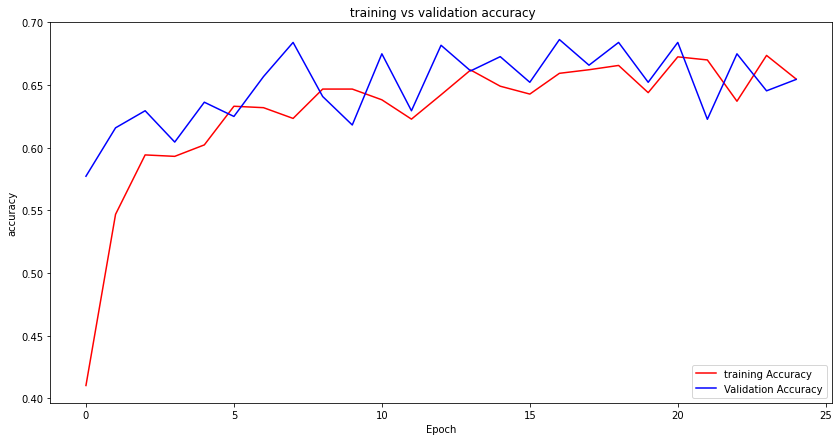

In [ ]:

acc=iterator.history['accuracy']
val_acc=iterator.history['val_accuracy']


epochs=range(len(acc))

fig=plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r', label='training Accuracy')
plt.plot(epochs,val_acc,'b', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.title(' training vs validation accuracy')
plt.legend(loc='lower right')
plt.show()


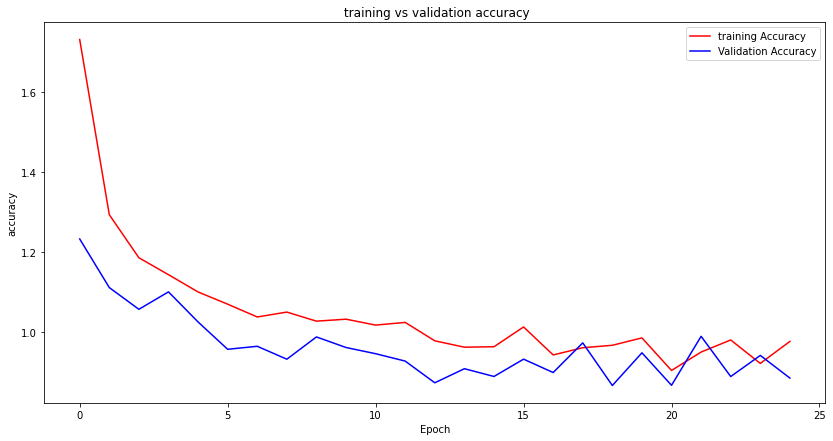

In [ ]:
loss=iterator.history['loss']
val_loss=iterator.history['val_loss']

fig2=plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r', label='training Accuracy')
plt.plot(epochs,val_loss,'b', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.title(' training vs validation accuracy')
plt.legend(loc='upper right')
plt.show()
